## Random Forest: Размер случайного леса

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

In [2]:
def write_answer(filename, answer):
    
    with open(filename, 'w') as fout:
        
        fout.write(str(answer))
        fout.close()

### Введение

Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

### Реализация в Scikit-Learn

В библиотеке scikit-learn случайные леса реализованы в классах <code>sklearn.ensemble.RandomForestClassifier</code> (для классификации) и <code>sklearn.ensemble.RandomForestRegressor</code> (для регрессии). Обучение модели производится с помощью функции fit, построение прогнозов — с помощью функции predict. Число деревьев задается с помощью поля класса n_estimators. 

Пример использования:

```python
import numpy as np
from sklearn.ensemble import RandomForestRegressor
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-3, 1, 10])
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
predictions = clf.predict(X)
```

Также в этом задании вам понадобится вычислять качество предсказаний на тестовой выборке. Мы будем пользоваться метрикой R2 — по сути, это среднеквадратичная ошибка (MSE), нормированная на отрезок [0, 1] и обращенная так, чтобы ее наилучшим значением была единица. Ее можно вычислить с помощью функции <code>sklearn.metrics.r2_score</code>. Первым аргументов является список правильных ответов на выборке, вторым — список предсказанных ответов. Пример использования:

```python
from sklearn.metrics import r2_score
print r2_score([10, 11, 12], [9, 11, 12.1])
```

#### 1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [3]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: <code>data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))</code>

In [4]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [5]:
X, y = data.iloc[:, :-1], data['Rings']

#### 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=42" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=42" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold.  В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [6]:
%%time

max_cv_score, n_optim, n_answer = 0, 0, 0
cv_scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1, 51):
    
    rf_reg = RandomForestRegressor(n_estimators=n, random_state=42)

    cv_score = np.mean(cross_val_score(rf_reg, X, y, cv=kfold, scoring='r2'))
    
    if cv_score > 0.52 and n_answer == 0:
        n_answer = n
    
    if cv_score > max_cv_score:
        
        max_cv_score = cv_score
        n_optim = n
    
    cv_scores.append(cv_score)
    
print(f'Max cross val R2 score on random forest with n_est={n_optim}: {max_cv_score}')

Max cross val R2 score on random forest with n_est=43: 0.5301160550942476
CPU times: user 1min 32s, sys: 265 ms, total: 1min 33s
Wall time: 1min 33s


#### 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

In [7]:
print(f'Min n_est with R2 cv_score > 0.52: {n_answer}')

write_answer('submission_random_forest_1.txt', n_answer)

Min n_est with R2 cv_score > 0.52: 27


#### 6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

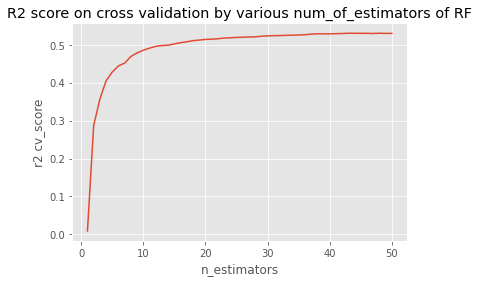

In [8]:
plt.plot(np.linspace(1, 50, 50), cv_scores)
plt.xlabel('n_estimators')
plt.ylabel('r2 cv_score')
plt.title('R2 score on cross validation by various num_of_estimators of RF')
plt.show()

В Случайном лесе отсутсвует переобучение (не ухудшается качество R2) при увеличении количества деревьев - базовых алгоритмов